## 2b. Training Models (MLPClassifier)

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../preprocessed/clean_survey.csv", index_col=False)
df

,q_000,q_001,q_003,q_004,q_005,q_006,q_007,q_008,q_009,q_011,...,q_130_NSW,q_130_NT,q_130_QLD,q_130_SA,q_130_TAS,q_130_VIC,q_130_WA,invol_score,q_031_adjusted,involvement_level
0,1.00,2,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,Low
1,0.89,2,0,0,0,1,0,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,Low
2,0.86,1,1,1,0,0,0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,Medium
3,0.85,2,0,1,0,1,0,0,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,Medium
4,0.71,1,0,1,0,1,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0.62,1,1,0,1,0,0,0,0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Low
871,1.00,0,1,1,1,1,1,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,Low
872,1.00,2,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,Low
873,1.00,3,1,1,1,1,1,1,1,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,Low


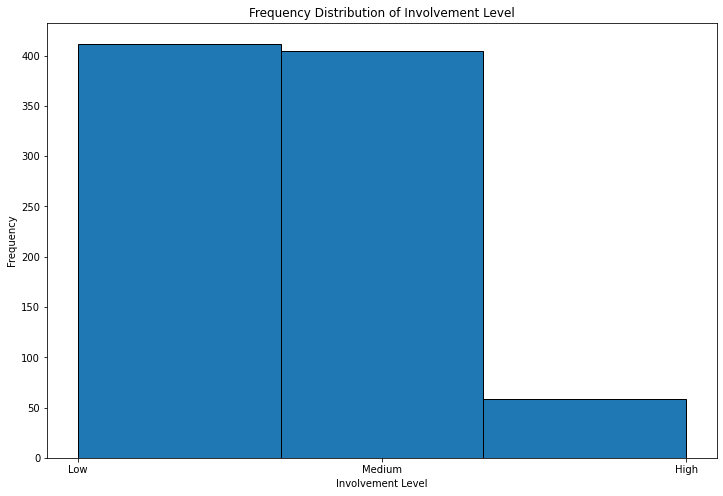

In [3]:
plt.figure(figsize=(12, 8))
df["involvement_level"].hist(bins=3, edgecolor='black')
plt.title('Frequency Distribution of Involvement Level')
plt.xlabel('Involvement Level')
plt.ylabel('Frequency')
plt.grid(False)  # Optionally turn off the grid if preferred
plt.show()

We can clearly see the imbalanced label distribution, where 'High' involvement has very few data instances. Thus, we oversample the dataset so that the labels are more balanced

In [4]:
from imblearn.over_sampling import SMOTE

# split to indenpendent and dependent variables
# drop all variables computing the labels
X = df.drop(['q_031_adjusted', 'invol_score', 'q_031', 'involvement_level'] + [f'q_0{i}' for i in range(45, 55)], axis=1)
y = df["involvement_level"]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding the labels into integers
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

# Printing the mapping from encoded labels to original class labels
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, random_state=42)

{0: 'High', 1: 'Low', 2: 'Medium'}


### 2.2 Neural Network

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [7]:
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train_encoded)

"""# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
"""

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100, 50, 20), (200,), (200, 100), (200, 50), (200, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}

# Initialize the MLPClassifier
mlp = MLPClassifier(max_iter=5000, random_state=42)


# Setup GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=5, scoring='f1_weighted', verbose=2)

# Fit the model
#grid_search.fit(X_train_resampled, y_train_resampled)
grid_search.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 20), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 20), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 20), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 20), learning_rate=constant, learning_rate_init=0.001, solver=lbfgs; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 20), learning_rate=constant, learning_rate_init=0.001, solver=lbfgs; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 20), learning_rate=constant, learning_rate_init=0.001, solver=lbfgs; total time=   1.

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=5000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(100, 50, 20), (200,),
                                                (200, 100), (200, 50),
                                                (200, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             scoring='f1_weighted', verbose=2)

In [8]:
# Best parameters found
print("Best parameters found: ", grid_search.best_params_)
best_params_grid_nn = grid_search.best_params_
# Best F1 weighted score
print("Best F1 weighted score: ", grid_search.best_score_)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
Best F1 weighted score:  0.6585593184433781


### Model Evaluation

In [9]:
import pickle

# best model
model = grid_search.best_estimator_

print(model.get_params())
model.fit(X_train_resampled, y_train_resampled)



{'activation': 'tanh', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_fun': 15000, 'max_iter': 5000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(200, 100, 50),
              learning_rate_init=0.01, max_iter=5000, random_state=42,
              solver='sgd')

In [10]:
# Save the fitted model to a file
"""with open('../models/neural_1.pkl', 'wb') as file:
    pickle.dump(model, file)"""

"with open('../models/neural_1.pkl', 'wb') as file:\n    pickle.dump(model, file)"

In [11]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, roc_auc_score

# Evaluating the model
y_proba = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled)


# Calculating various metrics
print("Hamming Loss:", hamming_loss(y_test_encoded, y_pred))
print("Subset Accuracy:", accuracy_score(y_test_encoded, y_pred))

# Micro-average
print("F1 Score (Micro):", f1_score(y_test_encoded, y_pred, average='micro'))
# Macro-average
print("F1 Score (Macro):", f1_score(y_test_encoded, y_pred, average='macro'))
# Weighted-average
print("F1 Score (Weighted):", f1_score(y_test_encoded, y_pred, average='weighted'))

# ROC-AUC
# Note: roc_auc_score expects a shape of (n_samples,) for binary problems and
# (n_samples, n_classes) for multi-class/multi-label with one-hot encoding.
# ROC-AUC calculation needs probabilistic predictions `y_proba`
# use macro since class labels are imbalanced
roc_auc = roc_auc_score(y_test_encoded, y_proba, average='macro', multi_class='ovr')
print("ROC-AUC (Macro):", roc_auc)

Hamming Loss: 0.3561643835616438
Subset Accuracy: 0.6438356164383562
F1 Score (Micro): 0.6438356164383562
F1 Score (Macro): 0.6263591271407843
F1 Score (Weighted): 0.6443087711799298
ROC-AUC (Macro): 0.7886066453084305


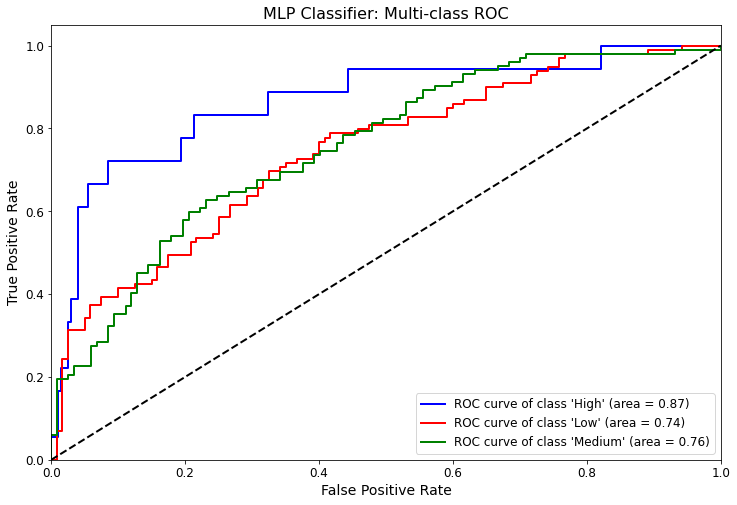

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Binarize the output labels for multi-class ROC curve plotting
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))
n_classes = y_test_binarized.shape[1]
# Colors for different classes
colors = cycle(['blue', 'red', 'green'])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
all_classes = model.classes_
for j in range(3):
    fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], y_proba[:, j])
    roc_auc[j] = auc(fpr[j], tpr[j])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for j, color in zip(range(n_classes), colors):
    plt.plot(fpr[j], tpr[j], color=color, lw=2,
                label=f"ROC curve of class '{label_mapping[j]}' (area = {roc_auc[j]:0.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title(f'MLP Classifier: Multi-class ROC', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Comments:
**TPR:** True positives / All positives. **FPR:** False positives / All negatives
- The curves are well above the diagonal line (which represents a random guess or no-discrimination line), suggesting that the classifier performs significantly better than random guessing for all classes
- High class has the highest True Positive Rate vs False Positive Rate Ratio
- The class "High" has an AUC of 0.89, which indicates very good predictive power. The classifier is able to distinguish the "High" class from the other classes quite effectively.
- The class "Medium" has an AUC of 0.78. It's somewhat effective, but not as strong as the "High" class.
- The class "Low" has an AUC of 0.76, which suggests moderate discriminative ability similar to "Medium". While the classifier can distinguish the "Low" class from the others, there's more room for error compared to the "High" class.


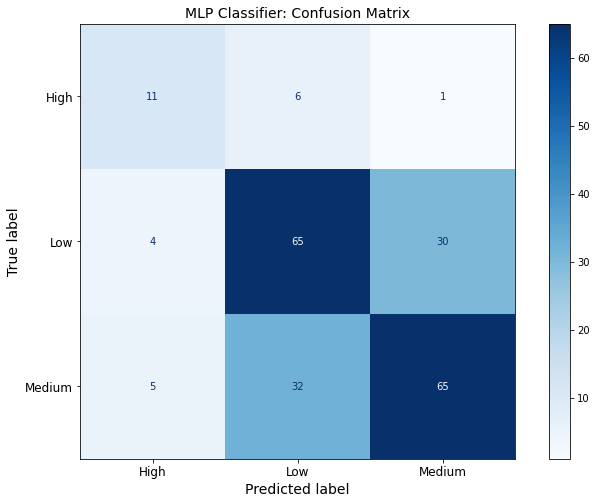

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
# Create a new figure or adjust the current figure size here
fig, ax = plt.subplots(figsize=(12, 8))
# Increase text font size within the matrix
disp.plot(ax=ax, cmap=plt.cm.Blues)  # Plot on the specified axes to control the size

# Now adjust the fontsize using ax properties
ax.set_title(f'MLP Classifier: Confusion Matrix', fontsize=14)  # Adjust title fontsize
ax.set_xlabel('Predicted label', fontsize=14)  # Adjust x-axis label fontsize
ax.set_ylabel('True label', fontsize=14)  # Adjust y-axis label fontsize
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick fontsize for both axes

plt.show()

##### Comments:
- The neural network model seems to perform best at identifying the "Low" class, as indicated by the higher number of true positives and relatively lower false negatives and false positives for this class.
- The neural network model is most frequently confusing the "Medium" class with "Low", as indicated by the high number of false negatives for "Medium" (34 instances predicted as "Low").
- The neural network model has more difficulty correctly identifying the "High" class, which could be due to fewer instances of "High" in the dataset (indicating possible class imbalance) or similar feature space areas between "High" and "Low", causing confusion.